In [ ]:
# | hide
%load_ext autoreload
%autoreload 2

# Port Mapping

stringdale edges have a port mapping language that allows us to map subobjects of the output of one node, into the inputs of the functions of the other nodes.

In python, a function's arguments are supplied as follows `f(*args,**kwargs)` where:

* args is a list of positional arguments
* kwargs is a dictionary that maps from the name of the keyword argument to its value
* positional arguments can also be called by their name

In stringdale, we encode both positional and keyword arguments as a dictionary whose keys are:

* Contiguous integers in case of positional arguments
* strings in case of keyword arguments
* each such key is called a `port` of the function

A port mapping is a sequence of terms of the form `<port>=<access_pattern>`
Where an access pattern defines which part of the output to use.

Here are some examples to illustrate this:

In [ ]:
from stringdale import V,E,Define

Let us make a nested object so we can see the power of port mapping in action.

Access patterns try to access object attributes and then object keys. Lets see both:

In [ ]:
class TestObj:
    def __init__(self):
        self.a = 10
        self.b = {'x': 20}
        self.c = {'y': 30}
    def __str__(self):
        return f'TestObj(a={self.a},b={self.b},c={self.c})'
    def __repr__(self):
        return self.__str__()

nested_object = {
    'a': 1,
    'b': 2,
    'c':{
        'a': 3,
        'b': 4
    },
    'd':TestObj(),
    'lists':[
        {'a':1,'b':2},
        {'a':3,'b':4},
        {'a':5,'b':6},
    ]
}



Now lets define some simple diagrams, try to guess what the input of each node will be

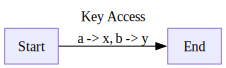

{'a': 1, 'b': 2, 'c': {'a': 3, 'b': 4}, 'd': TestObj(a=10,b={'x': 20},c={'y': 30}), 'lists': [{'a': 1, 'b': 2}, {'a': 3, 'b': 4}, {'a': 5, 'b': 6}]}


{'x': 1, 'y': 2}

In [ ]:
with Define('Key Access') as D:
    E('Start->End(x=a,y=b)')

D.draw()

print(nested_object)
D().run_all(nested_object)


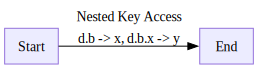

{'a': 1, 'b': 2, 'c': {'a': 3, 'b': 4}, 'd': TestObj(a=10,b={'x': 20},c={'y': 30}), 'lists': [{'a': 1, 'b': 2}, {'a': 3, 'b': 4}, {'a': 5, 'b': 6}]}


{'x': {'x': 20}, 'y': 20}

In [ ]:
with Define('Nested Key Access') as D:
    E('Start->End(x=d.b,y=d.b.x)')
D.draw()

print(nested_object)
D().run_all(nested_object)


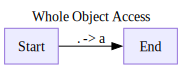

{'a': 1, 'b': 2, 'c': {'a': 3, 'b': 4}, 'd': TestObj(a=10,b={'x': 20},c={'y': 30}), 'lists': [{'a': 1, 'b': 2}, {'a': 3, 'b': 4}, {'a': 5, 'b': 6}]}


{'a': {'a': 1,
  'b': 2,
  'c': {'a': 3, 'b': 4},
  'd': TestObj(a=10,b={'x': 20},c={'y': 30}),
  'lists': [{'a': 1, 'b': 2}, {'a': 3, 'b': 4}, {'a': 5, 'b': 6}]}}

In [ ]:
with Define('Whole Object Access') as D:
    E('Start->End(a=.)')
D.draw()

print(nested_object)
D().run_all(nested_object)


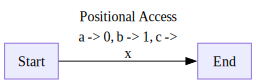

{'a': 1, 'b': 2, 'c': {'a': 3, 'b': 4}, 'd': TestObj(a=10,b={'x': 20},c={'y': 30}), 'lists': [{'a': 1, 'b': 2}, {'a': 3, 'b': 4}, {'a': 5, 'b': 6}]}


{0: 1, 1: 2, 'x': {'a': 3, 'b': 4}}

In [ ]:
with Define('Positional Access') as D:
    E('Start->End(0=a,1=b,x=c)')
D.draw()

print(nested_object)
D().run_all(nested_object)


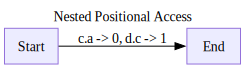

{'a': 1, 'b': 2, 'c': {'a': 3, 'b': 4}, 'd': TestObj(a=10,b={'x': 20},c={'y': 30}), 'lists': [{'a': 1, 'b': 2}, {'a': 3, 'b': 4}, {'a': 5, 'b': 6}]}


{0: 3, 1: {'y': 30}}

In [ ]:
with Define('Nested Positional Access') as D:
    E('Start->End(0=c.a,1=d.c)')
D.draw()

print(nested_object)
D().run_all(nested_object)


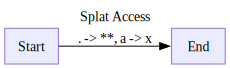

{'a': 1, 'b': 2, 'c': {'a': 3, 'b': 4}, 'd': TestObj(a=10,b={'x': 20},c={'y': 30}), 'lists': [{'a': 1, 'b': 2}, {'a': 3, 'b': 4}, {'a': 5, 'b': 6}]}


{'a': 1,
 'b': 2,
 'c': {'a': 3, 'b': 4},
 'd': TestObj(a=10,b={'x': 20},c={'y': 30}),
 'lists': [{'a': 1, 'b': 2}, {'a': 3, 'b': 4}, {'a': 5, 'b': 6}],
 'x': 1}

In [ ]:
with Define('Splat Access') as D:
    E('Start->End(**=.,x=a)')
D.draw()

print(nested_object)
D().run_all(nested_object)


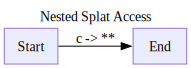

{'a': 1, 'b': 2, 'c': {'a': 3, 'b': 4}, 'd': TestObj(a=10,b={'x': 20},c={'y': 30}), 'lists': [{'a': 1, 'b': 2}, {'a': 3, 'b': 4}, {'a': 5, 'b': 6}]}


{'a': 3, 'b': 4}

In [ ]:
with Define('Nested Splat Access') as D:
    E('Start->End(**=c)') # this only works for dict likes, and not for arbitrary objects
D.draw()

print(nested_object)
D().run_all(nested_object)


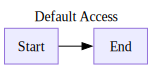

{'a': 1, 'b': 2, 'c': {'a': 3, 'b': 4}, 'd': TestObj(a=10,b={'x': 20},c={'y': 30}), 'lists': [{'a': 1, 'b': 2}, {'a': 3, 'b': 4}, {'a': 5, 'b': 6}]}


{'a': 1,
 'b': 2,
 'c': {'a': 3, 'b': 4},
 'd': TestObj(a=10,b={'x': 20},c={'y': 30}),
 'lists': [{'a': 1, 'b': 2}, {'a': 3, 'b': 4}, {'a': 5, 'b': 6}]}

In [ ]:
with Define('Default Access') as D:
    E('Start->End') # this is identical to 'Start->End(0=.)'
D.draw()


print(nested_object)
# note that if we got a single object, we return obj, rather than {0:obj}
D().run_all(nested_object)


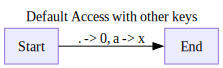

{'a': 1, 'b': 2, 'c': {'a': 3, 'b': 4}, 'd': TestObj(a=10,b={'x': 20},c={'y': 30}), 'lists': [{'a': 1, 'b': 2}, {'a': 3, 'b': 4}, {'a': 5, 'b': 6}]}


{0: {'a': 1,
  'b': 2,
  'c': {'a': 3, 'b': 4},
  'd': TestObj(a=10,b={'x': 20},c={'y': 30}),
  'lists': [{'a': 1, 'b': 2}, {'a': 3, 'b': 4}, {'a': 5, 'b': 6}]},
 'x': 1}

In [ ]:
with Define('Default Access with other keys') as D:
    E('Start->End(0=., x=a)')
D.draw()


print(nested_object)
D().run_all(nested_object)


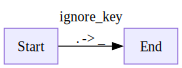

{'a': 1, 'b': 2, 'c': {'a': 3, 'b': 4}, 'd': TestObj(a=10,b={'x': 20},c={'y': 30}), 'lists': [{'a': 1, 'b': 2}, {'a': 3, 'b': 4}, {'a': 5, 'b': 6}]}


{}

In [ ]:
with Define('ignore_key') as D:
    # this is used to ignore the output of a previous node,
    E('Start->End(_=.)') 
D.draw()

print(nested_object)
D().run_all(nested_object)


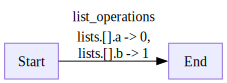

{'a': 1, 'b': 2, 'c': {'a': 3, 'b': 4}, 'd': TestObj(a=10,b={'x': 20},c={'y': 30}), 'lists': [{'a': 1, 'b': 2}, {'a': 3, 'b': 4}, {'a': 5, 'b': 6}]}


{0: [1, 3, 5], 1: [2, 4, 6]}

In [ ]:
with Define('list_operations') as D:
    # this is used to ignore the output of a previous node,
    E('Start->End(0=lists[].a,1=lists[].b)') 
D.draw()

print(nested_object)
D().run_all(nested_object)
